data/r95.dat


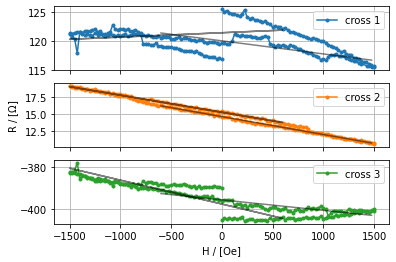

In [9]:
import csv
import matplotlib.pyplot as plt
import numpy as np

filelist=["data/r95.dat"]
labellist=["r95"]
filecount=0
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, axes = plt.subplots(3, 1, sharex=True)

for name in filelist:
    X=[]
    Y=[[],[],[]]
    linecount=0
    print(name)

    with open(name) as csvfile:
        reader = csv.reader(csvfile,delimiter=',')
        for row in reader:
            linecount+=1
            if linecount<33:
                continue
            X.append(float(row[4]))
            Y[0].append(float(row[19]))
            Y[1].append(float(row[20]))
            Y[2].append(float(row[21]))

    axes[0].plot(X,Y[0], '.-',label="cross 1",color=cycle[0])
    axes[1].plot(X,Y[1], '.-',label="cross 2",color=cycle[1])
    axes[2].plot(X,Y[2], '.-',label="cross 3",color=cycle[2])

    filecount+=1

    
    

axes[1].set_ylabel('R / [$\Omega$]')
axes[2].set_xlabel('H / [Oe]')
axes[1].grid()
axes[1].legend()
axes[0].grid()
axes[0].legend()
axes[2].grid()
axes[2].legend()



if 1==1:
    lbllist=["cross 1","cross 2","cross 3"]
    count=0
    Hc=600
    fitlist=[]

    for bridge in Y:
        Xtop=[]
        Ytop=[]
        Xbot=[]
        Ybot=[]
        maxi=0
        mini=0
        maxv=0
        minv=0

        for i in range(0,len(X)):
            if X[i]>maxv:
                maxi=i
                maxv=X[i]

            if X[i]<minv:
                mini=i
                minv=X[i]

        for i in range(0,len(X)):

            if (i>maxi and i<mini and X[i]>-Hc):
                Xtop.append(X[i])
                Ytop.append(bridge[i])

            if (i>mini or (i<maxi and X[i]<Hc)):
                Xbot.append(X[i])
                Ybot.append(bridge[i])  

        y_eff=[]
        m_t,b_t = np.polyfit(Xtop, Ytop, 1)
        m_b,b_b = np.polyfit(Xbot, Ybot, 1)
        fitlist.append([m_t,b_t,m_b,b_b,Xtop,Xbot])
        
        fitb=[m_b*x+b_b for x in Xbot]
        fitt=[m_t*x+b_t for x in Xtop]

        axes[count].plot(Xbot,fitb, '-', color="black",alpha=0.5)
        axes[count].plot(Xtop,fitt, '-', color="black",alpha=0.5)
        count+=1

#plt.savefig("out/r85_a.pdf")
plt.show()



bridge no. 2  max hysteresis:  -0.6463206602678504  Ohm, corresponding to H_eff= 248.46382727775085


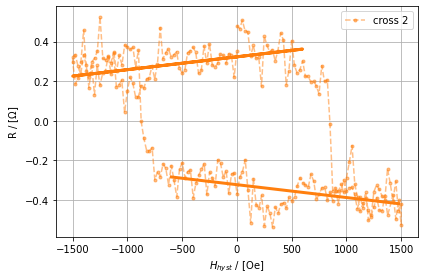

In [10]:
fig1 = plt.figure( figsize=(6,4))
ax2 = fig1.add_subplot(111)

lbllist=["cross 1","cross 2","cross 3"]
count=0

for bridge in Y:
    
    if count==0 or count==2:
        count+=1
        continue
    
    y_eff=[]
    [m_t,b_t,m_b,b_b,Xtop,Xbot]=fitlist[count]
    m=(m_t+m_b)/2
    b=(b_t+b_b)/2
    print("bridge no.",count+1," max hysteresis: ",b_t-b_b," Ohm, corresponding to H_eff=", (b_t-b_b)/m) 

    fitf=[m*x+b for x in X]
    fitb=[m_b*x+b_b - (m*x+b) for x in Xbot]
    fitt=[m_t*x+b_t - (m*x+b) for x in Xtop]

    for i in range(0,len(X)):
        y_eff.append(bridge[i]-(m*X[i]+b))


    ax2.plot(X,y_eff, '.--',color=cycle[count], alpha=0.5,label=lbllist[count])
    ax2.plot(Xbot,fitb, '-', color=cycle[count],linewidth=3.0)
    ax2.plot(Xtop,fitt, '-', color=cycle[count],linewidth=3.0)
    count+=1

ax2.set_ylabel('R / [$\Omega$]')
ax2.set_xlabel('$H_{h y s t}$ / [Oe]')
ax2.grid()
ax2.legend()

fig1.tight_layout()
#plt.savefig("out/r95_b.pdf")
fig1.show()